In [3]:
import sys
sys.path.insert(0, "./aipython")
import time
import numpy as np
from aipython.searchGeneric import *
from aipython.BidirectionalSearch import *
from aipython.CubeSearcher import *

import random
import copy
import math
import time
import matplotlib.pyplot as plt
import numpy as np
import os
from torch.utils.data import DataLoader,TensorDataset
from Cube import *
from CubeNN import *
from RandomCube import *

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class CubeProblem(Search_problem):
     
    def __init__(self, start):
        self.goal =Cube(start.level)
        self.start = start 
        self.moves =[]
        for index in range(0,start.level-1):
            for axis in ["x","y","z"]:
                for clockwise in [True,False]:
                    self.moves.append(CubeMove(axis,index, clockwise))

    def start_node(self):
        return self.start
    
    def goal_node(self):
        return self.goal

    def is_goal(self,node):
        return node.is_solve()

    def heuristic(self, node):
        c,s,f = node.train_data()
        c_t =torch.tensor([c]).to(device)
        s_t =torch.tensor([s]).to(device)
        f_t =torch.tensor([f]).to(device)
        h=model(c_t,s_t,f_t)
        return h.item()
    

    def neighbors(self, node):
        neighs=[]
        for move in self.moves:
            new_node = copy.deepcopy(node)
            new_node.rotate(move)
            new_arc = Arc(node,new_node,1,move)
            neighs.append(new_arc)  
        return neighs

In [5]:
model = CubeNN(3).to(device)
model.load_state_dict(torch.load("cube_new_epoch=2300.pth", map_location=torch.device(device)) )
model.eval()

CubeNN(
  (c_input): Linear(in_features=144, out_features=6000, bias=True)
  (s_inputs): ModuleList(
    (0): Linear(in_features=144, out_features=6000, bias=True)
  )
  (f_inputs): ModuleList(
    (0): Linear(in_features=36, out_features=6000, bias=True)
  )
  (bn1): BatchNorm1d(6000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden1): Linear(in_features=6000, out_features=2000, bias=True)
  (bn2): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (blocks): ModuleList(
    (0-4): 5 x ModuleList(
      (0): Linear(in_features=2000, out_features=2000, bias=True)
      (1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Linear(in_features=2000, out_features=2000, bias=True)
      (3): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (output): Linear(in_features=2000, out_features=1, bias=True)
)

In [6]:
creator = CubeCreater(3)

In [10]:
count = 100
shuffle_step = 10
times = []
costs = []
success= 0
for i in range(count):
    puzzle = CubeProblem(creator.create(shuffle_step))
    searcher = CubeSearcher(puzzle,0.2)
    start_t = time.time()
    result = searcher.search(120)
    if result != None:
        print(f"CubeSearcher[{i}/{count}]:{round(time.time()-start_t,2)}s  cost: {result.cost}")
        success+=1
        times.append(time.time()-start_t)
        costs.append(result.cost)

No (more) solutions. Total of 3807 paths expanded.
12 paths have been expanded and 127 paths remain in the frontier
CubeSearcher[1/100]:1.32s  cost: 12
13 paths have been expanded and 132 paths remain in the frontier
CubeSearcher[2/100]:1.37s  cost: 10
334 paths have been expanded and 3670 paths remain in the frontier
CubeSearcher[3/100]:19.28s  cost: 16
10 paths have been expanded and 104 paths remain in the frontier
CubeSearcher[4/100]:0.18s  cost: 10
No (more) solutions. Total of 4349 paths expanded.
No (more) solutions. Total of 4531 paths expanded.
10 paths have been expanded and 105 paths remain in the frontier
CubeSearcher[7/100]:1.09s  cost: 10
15 paths have been expanded and 161 paths remain in the frontier
CubeSearcher[8/100]:1.68s  cost: 10
10 paths have been expanded and 110 paths remain in the frontier
CubeSearcher[9/100]:1.13s  cost: 10
10 paths have been expanded and 103 paths remain in the frontier
CubeSearcher[10/100]:1.07s  cost: 10
11 paths have been expanded and 119

In [8]:
print(sum(costs)/len(costs))
print(sum(times)/len(times),success,"/",count)

12.126760563380282
4.980436983242841 71 / 100


In [7]:
def scatter_data2d(pred1,pred2,label):
    x1=label
    x2=copy.deepcopy(label)
    for i in range(len(label)):
        x2[i]+=0.4
    

    # 创建散点图
    plt.scatter(x1, pred1, marker='s', color='b', alpha=0.1, label='model 1')
  
    plt.scatter(x2, pred2, marker='s', color='r', alpha=0.1, label='model 2')
    plt.grid(True)
    plt.axhline(y=0, color='black')
    plt.legend()
    plt.show()



In [8]:
model_1 = CubeNN(3).to(device)
model_1.load_state_dict(torch.load("cube_new_epoch=2300.pth", map_location=torch.device(device)) )
model_1.eval()

model_2 = CubeNN(3).to(device)
model_2.load_state_dict(torch.load("cube_new_epoch=2550.pth", map_location=torch.device(device)) )
model_2.eval()

CubeNN(
  (c_input): Linear(in_features=144, out_features=6000, bias=True)
  (s_inputs): ModuleList(
    (0): Linear(in_features=144, out_features=6000, bias=True)
  )
  (f_inputs): ModuleList(
    (0): Linear(in_features=36, out_features=6000, bias=True)
  )
  (bn1): BatchNorm1d(6000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (hidden1): Linear(in_features=6000, out_features=2000, bias=True)
  (bn2): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (blocks): ModuleList(
    (0-4): 5 x ModuleList(
      (0): Linear(in_features=2000, out_features=2000, bias=True)
      (1): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): Linear(in_features=2000, out_features=2000, bias=True)
      (3): BatchNorm1d(2000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (output): Linear(in_features=2000, out_features=1, bias=True)
)

In [9]:
_ , datas, labels = CubeDataset(3).get_random_cubes(200,20,device) #create dataset
pred1= model_1(datas[0], datas[1], datas[2]) 
pred2 = model_2(datas[0], datas[1], datas[2])

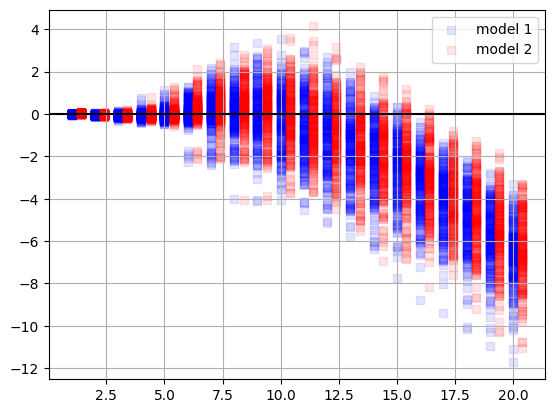

In [10]:
delta1 = (pred1-labels).view(-1).tolist()
delta2 = (pred2-labels).view(-1).tolist()
scatter_data2d(delta1,delta2,labels.view(-1).tolist())
